#### Data Import 

In [1]:
# Imports
import pandas as pd
import warnings
from helpers import * 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    # Import entities / skills / wikipedia
    entities = pd.read_csv("../data/classeek_entities.csv")
    skills = pd.read_csv("../data/classeek_skills.csv")
    alt_names = pd.read_csv("../data/classeek_alternative_names.csv")
    performances = pd.read_csv("../data/classeek_performances.csv")
    pieces = pd.read_csv("../data/classeek_pieces.csv")
    wikipedia_pv = pd.read_csv("../data/classeek_wikipedia_page_views.csv")
    mediamentions = pd.read_csv("../data/classeek_media_mentions.csv")
    biographies = pd.read_csv("../data/classeek_biographies.csv")

    entities_performances = pd.read_csv("../data/classeek_entities_performances.csv")
    entities_pieces = pd.read_csv("../data/classeek_entities_pieces.csv")
    entities_skills = pd.read_csv("../data/classeek_entity_skills.csv")

# 
# Frederick Kiddle 
#### Entity ID : 2ffe418b-f92d-400b-9b2c-8b3f53c4fa8f

In [2]:
entity_id = '2ffe418b-f92d-400b-9b2c-8b3f53c4fa8f'

## Basic Informations 

In [3]:
# Basic information about the entity 
entity_info = get_info(entity_id, entities, entities_performances, entities_pieces, entities_skills, mediamentions, 
             wikipedia_pv, biographies, alt_names, include_lists = True)
infos = ['id', 'name', 'gender', 'alive', 'birth_date', 'death_date', 'current_influence_percentile']
entity_info.iloc[:, 0:7]

,id,name,gender,alive,birth_date,death_date,current_influence_percentile
15453,2ffe418b-f92d-400b-9b2c-8b3f53c4fa8f,Frederick Kiddle,NaN,True,NaN,NaN,NaN


In [4]:
# Number of cells in other tables linked to that entity 
entity_info.iloc[:, 7:13]

,nb_perf,nb_pieces,nb_media_mentions,nb_skills,nb_alt_names,nb_biographies
15453,2628,4076,0,2,2,0


## 1 - Performances 

In [5]:
# Extract performances 
df_perfs = performances[performances.id.apply(lambda x : x in entity_info.perf_list.to_list()[0])].loc[:, ['date', 'venue', 'country', 'city', 'title', 'key', 'continent']]
df_perfs.head(10)

,date,venue,country,city,title,key,continent
193,1917-10-12 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 42,NaN,Europe
199,1918-08-15 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 05,NaN,Europe
228,1917-10-20 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 49 Last Night Of The Proms 1917,NaN,Europe
229,1918-08-10 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 01 First Night Of The Proms 1918,NaN,Europe
230,1918-08-12 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 02,NaN,Europe
231,1918-08-13 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 03,NaN,Europe
232,1918-08-14 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 04,NaN,Europe
233,1918-08-16 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 06,NaN,Europe
234,1918-08-17 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 07,NaN,Europe
235,1918-08-19 19:30:00.000000,Queen's Hall,United Kingdom,NaN,Prom 08,NaN,Europe


## 2 - Pieces 

In [6]:
df_pieces = pieces[pieces.id.apply(lambda x : x in entity_info.pieces_list.to_list()[0])]
df_pieces.loc[:, ['composer', 'title', 'source']].head(10)

,composer,title,source
19578,Josef Suk,Scherzo fantastique,20
27272,Johannes Brahms,Double Concerto for violin and cello in A minor,20
27278,Igor Stravinsky,Petrushka (1911 version),20
27374,Maurice Ravel,Rapsodie espagnole,20
27410,Ludwig Van Beethoven,Piano Concerto No 5 in E flat major,20
27413,Ludwig Van Beethoven,Piano Concerto No 4 in G major,20
27415,Ludwig Van Beethoven,Overture 'Leonore' No. 1,20
27418,Edward Elgar,Symphony No 1 in A flat major,20
27421,Franz Schubert,Symphony No 9 in C major 'Great',20
27427,Ludwig Van Beethoven,Symphony No 9 in D minor,20


## 3 - Media mentions 

In [7]:
df_medias = mediamentions[mediamentions.id.apply(lambda x : x in entity_info.media_mentions.to_list()[0])]
df_medias.loc[:, ['comparable_text', 'url', 'header_text']].head(10)

,comparable_text,url,header_text


In [9]:
# One example of media mention
if len(df_medias) > 0 : 
    df_medias.iloc[2].comparable_text

## 4 - Wikipedia Page Views 

In [10]:
df_wiki = wikipedia_pv[wikipedia_pv.id.apply(lambda x : x in entity_info.wiki_pv.to_list()[0])]
df_wiki.loc[:, ['en', 'fr', 'de', 'it', 'ru', 'period_start_date']].head(5)

,en,fr,de,it,ru,period_start_date


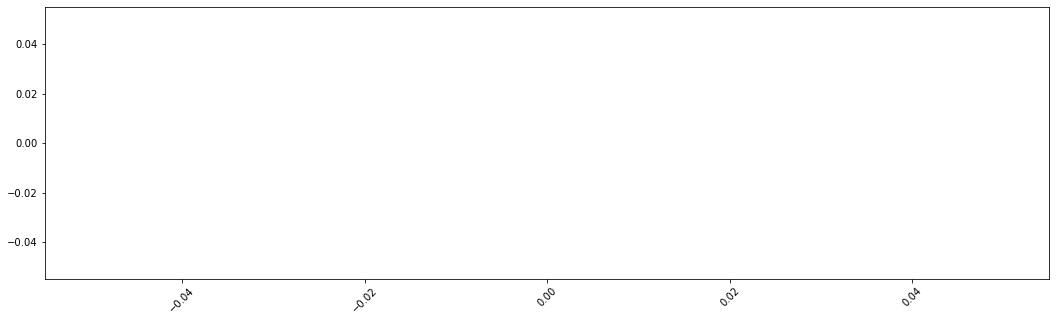

In [11]:
import matplotlib.pyplot as plt
x = df_wiki.period_start_date.to_list()
y = df_wiki.en.to_list()
plt.figure(figsize=[18, 5])
plt.xticks(rotation=45)
plt.plot(x, y)

## 5 - Skills 

In [12]:
df_skills = skills[skills.id.apply(lambda x : x in entity_info.skills_list.to_list()[0])]
df_skills.loc[:, ['name']]

,name
56,Pianist
71,Organist


## 6 - Alternative Names 

Alternative names are the names used by developpers to map down several entities to one during scraping operations. They are not related to the aliases found with fuzzy string matching during cleaning. 

In [13]:
entity_info.alter_names.to_list()

[['frederick kiddle', 'kiddle frederick']]

## 7 - Biographies 

In [14]:
df_bios = biographies[biographies.id.apply(lambda x : x in entity_info.bios_list.to_list()[0])]
df_bios.loc[:, ['detail', 'year', 'source']]

,detail,year,source


In [15]:
# One bography example 
if len(df_bios) > 0 : 
    df_bios.sample().detail